Import all important stuff

In [ ]:
# import ssl

from bertopic.representation import KeyBERTInspired
import pandas as pd
import nltk
from nltk.corpus import stopwords
from datetime import datetime
from textblob import TextBlob
from textblob_de import TextBlobDE
from datasets import load_dataset

import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import importlib
import functions
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import nbconvert

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Jacob\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from functions import *
importlib.reload(functions)

file_path = "C:/Users/Jacob/OneDrive/uni/MA WiSoz/Semester III/Computational Social Sciences/foPra/data/"

Load all data 

In [ ]:
party_colors = {
    "CDU": (0, 0, 0),         # Black
    "SPD": (255, 0, 0),       # Red
    "FDP": (235, 235, 20),     # Yellow
    "AFD": (135, 206, 250),   # Sky Blue
    "LEFT": (128, 0, 128),    # Purple
    "GREENS_DE": (0, 128, 0),     # Green
    "ÖVP": (0, 0, 0),         # Black
    "SPÖ": (255, 0, 0),       # Red
    "NEOS": (235, 235, 20),     # Yellow
    "FPÖ": (135, 206, 250),   # Sky Blue
    #"LEFT": (128, 0, 128),    # Purple
    "GREENS_AU": (0, 128, 0)     # Green
}

In [ ]:
# Load the DataFrame from a pickle file
df_manifesto = pd.read_pickle('data/df_manifesto_predictions.pkl') 

In [ ]:
# Group by 'manifesto_id' and calculate the score
manifesto_scores = df_manifesto.groupby('manifesto_id').apply(
    lambda x: pd.Series({
        'Expenditure score': x['predicted_label'].mean(),
        'party': x['party'].iloc[0],
        'country': x['country'].iloc[0],
        'year': x['year'].iloc[0]
    })
)


C:\Users\Jacob\AppData\Local\Temp\ipykernel_10148\1798923101.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



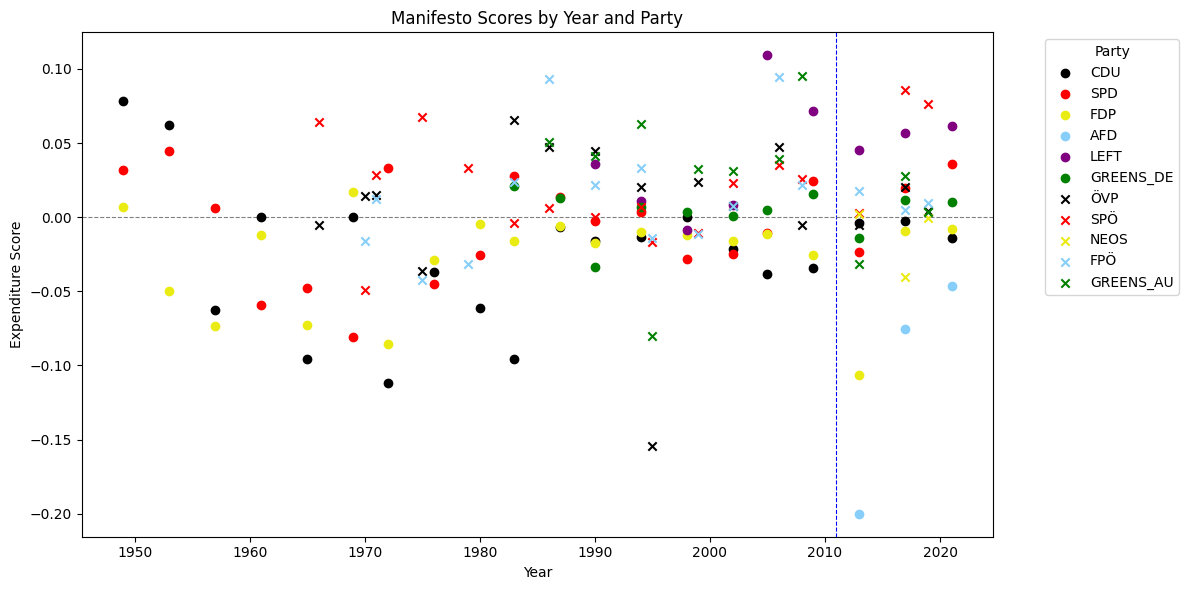

In [ ]:


# Create the scatter plot
plt.figure(figsize=(12, 6))
for party, color in party_colors.items():
    party_data = manifesto_scores[manifesto_scores['party'] == party]
    country = party_data['country'].iloc[0]
    if country == 'DE':
        marker = 'o' 
    else:
        marker = 'x'
    plt.scatter(
        party_data['year'], 
        party_data['Expenditure score'], 
        label=party, 
        color=[c / 255 for c in color],
        marker= marker,
        zorder=2
    )

plt.axvline(x=2011, color='blue', linestyle='--', linewidth=0.8, zorder=-1)
# plt.text(2011, plt.ylim()[1], 'Schuldenbremse', color='blue', fontsize=10, ha='left', va='bottom', rotation=90)
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8, zorder=-1)
# Add labels, legend, and title
plt.xlabel('Year')
plt.ylabel('Expenditure Score')
plt.title('Manifesto Scores by Year and Party')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#topic_model = BERTopic.load("bertopic_model.pkl")
topic_model = BERTopic.load(file_path)


No sentence-transformers model found with name manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2024-1-1. Creating a new one with mean pooling.
Some weights of XLMRobertaModel were not initialized from the model checkpoint at manifesto-project/manifestoberta-xlm-roberta-56policy-topics-sentence-2024-1-1 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-03-29 00:22:37,243 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


In [ ]:
with open("topics_over_time.pkl", "rb") as f:
    topics_over_time = pickle.load(f)

In [ ]:
# Load the topics from a pickle file
topics = pd.read_pickle('topics.pkl')

# Load the probabilities from a pickle file
probs = pd.read_pickle('probs.pkl')

#df_manifesto["topic"] = topics


In [ ]:


def generate_wordcloud(dataframe, 
                       topic_ids, 
                       cmp_codes,  
                       width=800, 
                       height=400, 
                       background_color="white"):
    """
    Generate and display a word cloud for the specified topic and cmp codes.

    Parameters:
    dataframe (pd.DataFrame): The input dataframe containing text data.
    topic_ids (list): List of topic IDs to filter the dataframe.
    cmp_codes (list): List of cmp codes to filter the dataframe.
    stopwords_set (set): Set of stopwords to exclude from the word cloud.
    width (int): Width of the word cloud image. Default is 800.
    height (int): Height of the word cloud image. Default is 400.
    background_color (str): Background color of the word cloud. Default is "white".

    Returns:
    None: Displays the generated word cloud.
    """
    # Filter the dataframe for the specified conditions
    # filtered_data = apply_labels(dataframe, topic_ids, cmp_codes, 0)
    filtered_data = dataframe[(dataframe["cmp_code"] == cmp_codes) & (dataframe["topic"] == topic_ids)]

    # Combine all text into a single string
    combined_text = " ".join(filtered_data["text"].dropna())

    stopwords_set = set(stopwords.words('german'))  # Generate the word cloud
    wordcloud = WordCloud(width=width, height=height, background_color=background_color, stopwords=stopwords_set).generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    # return filtered_data

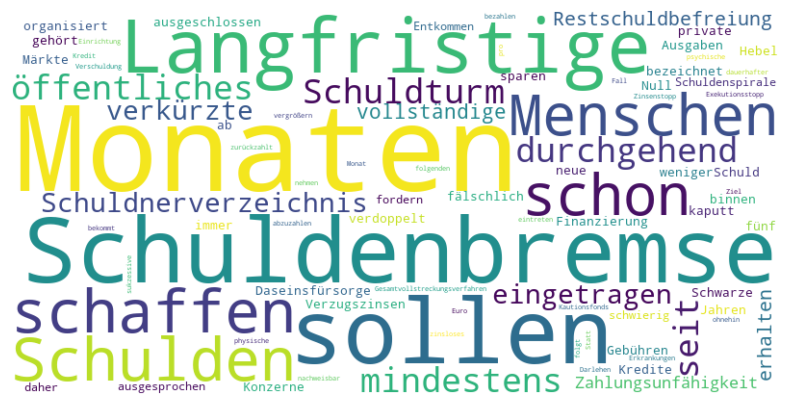

,text,cmp_code,manifesto_id,party,country,year,doc size of party,category,description_md,topic,label,predicted_label
85465,Langfristige Ausgaben werden immer weniger übe...,504.0,41223_201709,LEFT,DE,2017,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
85466,Sie werden fälschlich als Schulden bezeichnet ...,504.0,41223_201709,LEFT,DE,2017,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
85514,Die Schuldenbremse und die Schwarze Null sind ...,504.0,41223_201709,LEFT,DE,2017,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
87086,Dazu gehört für uns Menschen die schon durchge...,504.0,41223_201709,LEFT,DE,2017,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
89060,Menschen die schon durchgehend seit mindestens...,504.0,41223_202109,LEFT,DE,2021,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
91424,Die Schuldenbremse schaffen wir ab,504.0,41223_202109,LEFT,DE,2021,16023,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
115191,Bei Zahlungsunfähigkeit verdoppelt sich durch ...,504.0,42320_201309,SPÖ,AU,2013,10728,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
115193,Wir fordern daher ein Gesamtvollstreckungsverf...,504.0,42320_201309,SPÖ,AU,2013,10728,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
116304,Was bei dauerhafter Verschuldung folgt sind na...,504.0,42320_201710,SPÖ,AU,2017,10728,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,-1
117433,Statt den Kredit den sie ohnehin nehmen muss u...,504.0,42320_201710,SPÖ,AU,2017,10728,welfare +,"Favourable mentions of need to introduce, main...",34,1.0,1


In [ ]:
generate_wordcloud(df_manifesto, 34, 504)

In [ ]:
# Filter the dataframe for the specified conditions
# filtered_df = df_manifesto[(df_manifesto["cmp_code"].isin([605, 605.1])) & (df_manifesto["topic"] == 9)]
austerity = df_manifesto[(df_manifesto["label"] == 2)]
expenditure = df_manifesto[(df_manifesto["label"] == 1)]
# Count the number of statements per party
austerity_distribution = austerity.groupby("party").size() / austerity.groupby("party")["doc size of party"].first()
expenditure_distribution = expenditure.groupby("party").size() / expenditure.groupby("party")["doc size of party"].first()

merged_distribution = pd.merge(
    austerity_distribution.rename("Austerity Positions"),
    expenditure_distribution.rename("Expenditure Positions"),
    left_index=True,
    right_index=True
)* 100
merged_distribution = merged_distribution.reindex(party_colors.keys())
merged_distribution

,Austerity Positions,Expenditure Positions
party,,
CDU,1.757498,0.483715
SPD,0.783309,0.688141
FDP,1.900874,0.306181
AFD,1.150121,0.060533
LEFT,0.174749,1.004806
GREENS_DE,0.697752,0.463775
ÖVP,0.967671,0.417858
SPÖ,0.279642,0.577927
NEOS,0.884330,0.389105


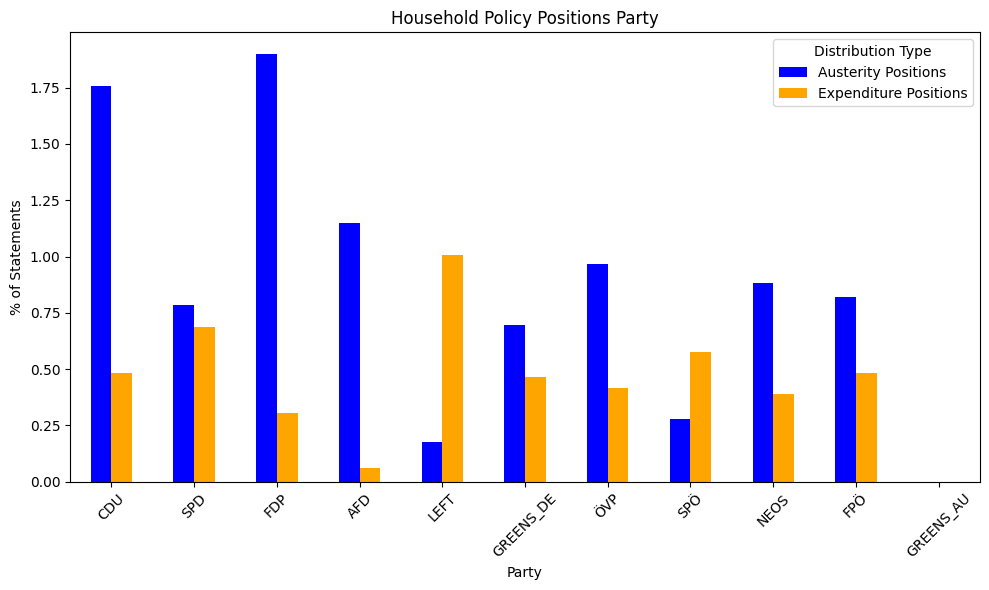

In [ ]:
# Plot the merged_distribution DataFrame
merged_distribution.plot(kind='bar', figsize=(10, 6), color=['blue', 'orange'])

# Add labels and title
plt.xlabel('Party')
plt.ylabel('% of Statements')
plt.title('Household Policy Positions Party')
plt.xticks(rotation=45)
plt.legend(title='Distribution Type')

# Show the plot
plt.tight_layout()
plt.show()

Next: filter topics and codes to automatically code the topics.

In [ ]:
topics_filter = get_topics(df_manifesto, cmp_categories)


In [ ]:
list_topic_409 = topics_filter["Keynesian Demand Management"]
df_subset_409 = tm_df[tm_df['Topic'].isin(list_topic_409)]

In [ ]:
topic_model.get_document_info(df_manifesto["text"])

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Representative_document
0,Düsseldorfer Leitsätze vom 15. Juli 1949 Das ...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
1,In der ersten Hälfte des Jahres 1948 war der T...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
2,Produktion und Arbeitsmoral waren auf ein Mini...,1,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN,arbeitsbedingungen - arbeitnehmerinnen arbeitn...,False
3,"Der Kampf um die Ware, der ein Kampf gegen den...",-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
4,Die Korruption griff in erschreckendem Maße um...,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
...,...,...,...,...,...,...,...
95678,Und zu machen.,152,152_nan_nan nan_nan getan_nan etwa,"[nan, nan nan, nan getan, nan etwa, ei nan, na...",NaN,nan - nan nan - nan getan - nan etwa - ei nan ...,False
95679,Jetzt liegt es bei Ihnen.,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False
95680,In Wahlen entscheidet eine Gesellschaft darübe...,30,30_wählerinnen wähler_wählerin lieber_lieber w...,"[wählerinnen wähler, wählerin lieber, lieber w...",NaN,wählerinnen wähler - wählerin lieber - lieber ...,False
95681,Wahlen sind ein Moment der Freiheit.,-1,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN,sicherheit - demokratisch - demokrati - sozial...,False


In [ ]:
extract_topics(self, topic_model, documents, c_tf_idf, topics)


Inspect the data

In [ ]:
topic_model.visualize_topics()

In [ ]:
topic_model.visualize_barchart()

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_manifesto["text"])


In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,38779,-1_sicherheit_demokratisch_demokrati_sozial,"[sicherheit, demokratisch, demokrati, sozial, ...",NaN
1,0,8594,0_kindern_kinderbetreuung_kindergeld_familien,"[kindern, kinderbetreuung, kindergeld, familie...",NaN
2,1,3254,1_arbeitsbedingungen_arbeitnehmerinnen arbeitn...,"[arbeitsbedingungen, arbeitnehmerinnen arbeitn...",NaN
3,2,2026,2_erneuerbaren energien_erneuerbar energien_au...,"[erneuerbaren energien, erneuerbar energien, a...",NaN
4,3,1986,3_sozial wohnungsbau_sozialen wohnungsbaus_soz...,"[sozial wohnungsbau, sozialen wohnungsbaus, so...",NaN
...,...,...,...,...,...
209,208,21,208_verbraucherschutzverbänd sollen_fördert ve...,"[verbraucherschutzverbänd sollen, fördert verb...",NaN
210,209,21,209_arbeitsmarkt steuerreform_steuerreform ent...,"[arbeitsmarkt steuerreform, steuerreform entbü...",NaN
211,210,21,210_verbesserung umweltpolitik_umweltpolitik s...,"[verbesserung umweltpolitik, umweltpolitik stä...",NaN
212,211,21,211_hoheitsverwaltung muß_möchten gesellschaft...,"[hoheitsverwaltung muß, möchten gesellschaftli...",NaN


Group and Compare Topics Across Parties
Your goal is to compare how political parties talk about different topics. You can:

Analyze topic distribution per party:

In [ ]:
party_topic_counts = df_manifesto.groupby(["party", "topic"]).size().unstack().fillna(0)
party_topic_counts = party_topic_counts.div(df_manifesto.groupby("party")["doc size of party"].first(), axis=0).T


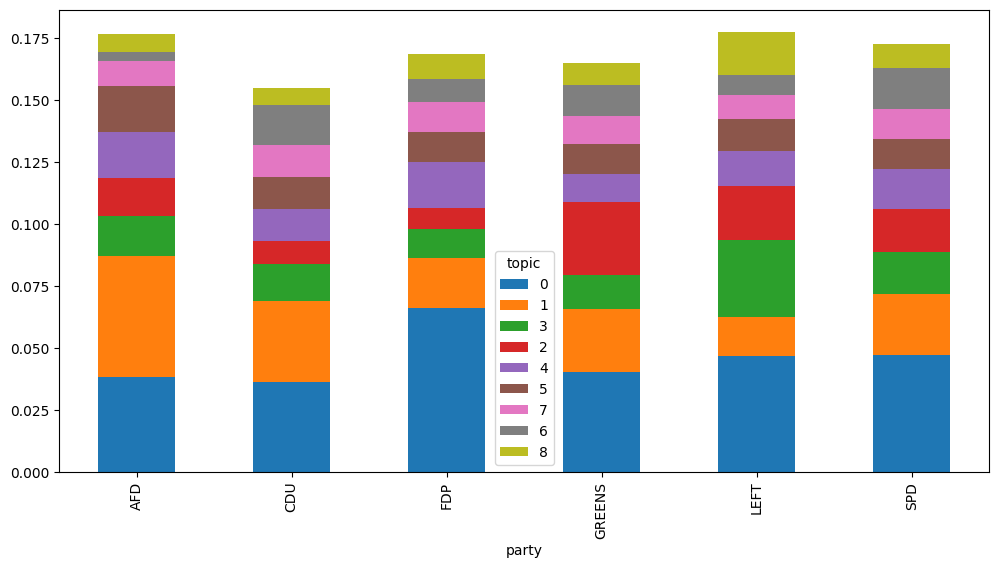

topic,0,1,3,2,4,5,7,6,8
party,,,,,,,,,
AFD,0.038415,0.048476,0.016159,0.015549,0.018598,0.018598,0.010061,0.003659,0.007317
CDU,0.036032,0.032706,0.015056,0.009473,0.012913,0.012631,0.013082,0.016014,0.007105
FDP,0.066203,0.019956,0.011924,0.008363,0.018673,0.011883,0.012297,0.009150,0.010185
GREENS,0.040180,0.025586,0.013480,0.029671,0.011103,0.012106,0.011549,0.012292,0.008801
LEFT,0.046531,0.016025,0.030922,0.021663,0.014125,0.012998,0.009852,0.008012,0.017449
SPD,0.047167,0.024740,0.016761,0.017422,0.016100,0.012040,0.011992,0.016619,0.009632


In [ ]:
# Call the function
ptc_top3 = plot_top_topics(party_topic_counts, 9)
ptc_top3

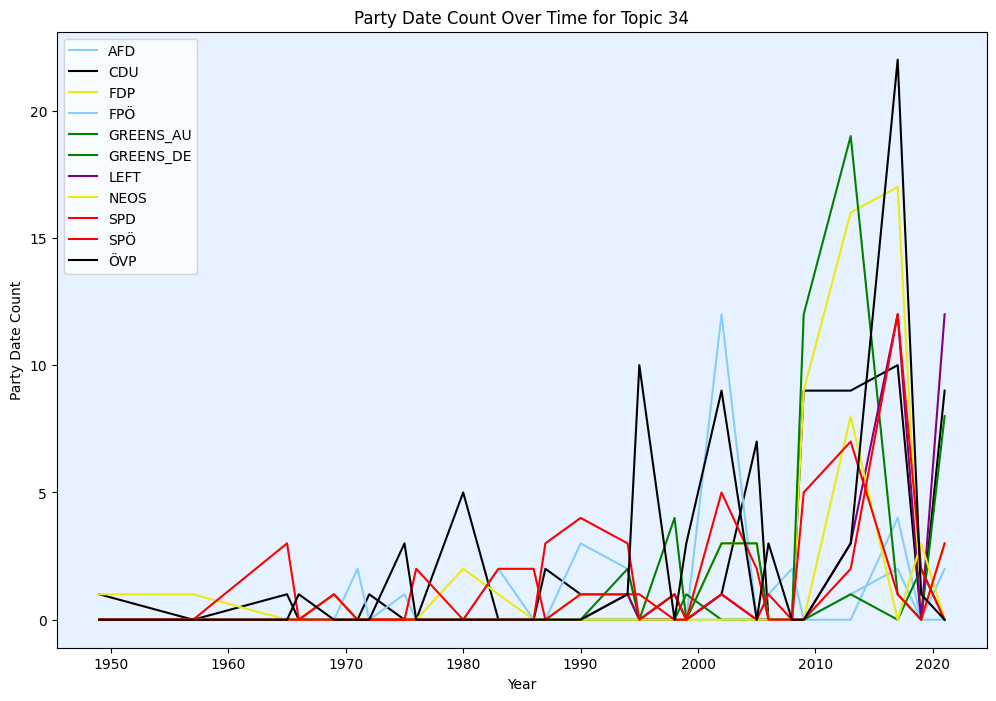

In [ ]:
topic_per_party = filter_by_topic(df_manifesto, 34, party_colors)

In [ ]:
df_filtered = df_manifesto[df_manifesto['topic'] == 5]
# df_filtered['party_date_count'] = df_filtered.groupby(['party', 'date'])['date'].transform('count')


In [ ]:
def plot_topic_n_counts(df, topic_number):
    # Filter the DataFrame to include only the specified topic
    topic_n_counts = df.loc[[topic_number]]
    
    # Plot the results
    topic_n_counts.plot(kind="bar", figsize=(12, 6))
    plt.show()

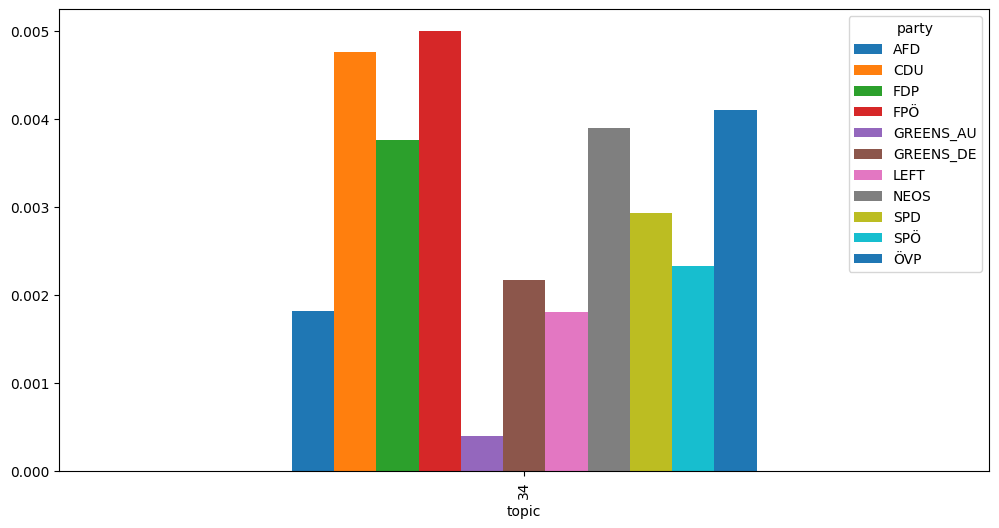

In [ ]:
plot_topic_n_counts(party_topic_counts, 34)

Cluster topics into categories (e.g., Economy, Environment, Social Policy) using manual labeling or embeddings.

Analyze sentiment per topic & party (to see how parties frame topics differently):

- needs to be filtered for topic

In [ ]:
df_filtered = df_manifesto[df_manifesto['topic'] == 33]


df_filtered["sentiment"] = df_filtered["text"].apply(lambda x: TextBlobDE(x).sentiment.polarity)


In [ ]:
non_zero_sentiment_count = (df_filtered["sentiment"] != 0).sum()
non_zero_sentiment_count

175

In [ ]:
cmp_cat = limit_to_cmp(df_manifesto, 400, 450)

df_pivot_cat = cmp_cat.pivot_table(index='date', columns='party', values='sentiment', aggfunc="mean").fillna(0)


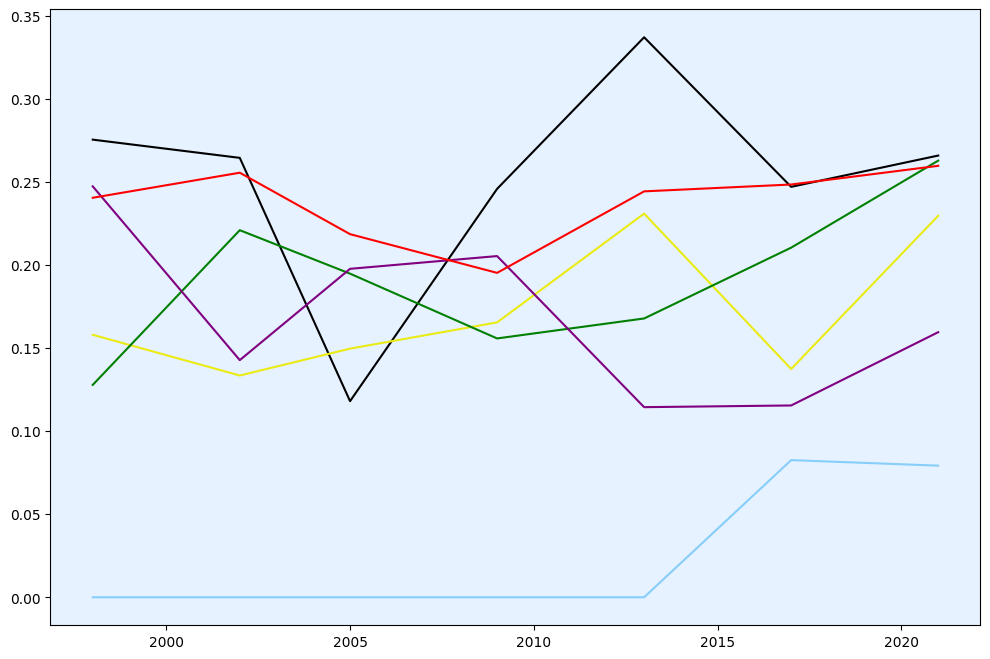

In [ ]:
# Plot the data
plt.figure(figsize=(12, 8))
for party in df_pivot_cat.columns:
    # plt.plot(df_pivot.index, df_pivot[party], label=party)
    # if df_pivot[party].max() > 0:
    plt.plot(df_pivot_cat.index, df_pivot_cat[party], label=party, color=[c/255 for c in party_colors[party]])
    plt.gca().set_facecolor((0.9, 0.95, 1))  # Set background color to light grey/blue

Visualize Topic Evolution
Overlay different parties on a timeline to compare their topic distributions.
Heatmaps to show intensity of topics across parties and time

In [ ]:
def plot_cmp_code_heatmap(df, category, log=True):
    """
    This function processes the given DataFrame to create a heatmap of cmp_code counts over time.

    Parameters:
    df_manifesto (pd.DataFrame): The input DataFrame containing 'cmp_code', 'date', and 'text' columns.

    Returns:
    None: Displays a heatmap.
    """
    # Ensure 'cmp_code' is numeric and drop rows with NaN values in 'cmp_code'
    df['cmp_code'] = pd.to_numeric(df['cmp_code'], errors='coerce')
    df_cleaned = df.dropna(subset=['cmp_code'])

    # Drop rows with invalid 'date' values
    df_cleaned = df_cleaned.dropna(subset=['year'])

    # Filter rows where the first digit of 'cmp_code' equals zero
    df_cleaned = df_cleaned[df_cleaned['cmp_code'].apply(lambda x: any(str(x).startswith(str(cat)) for cat in category))]

    # Create a pivot table with 'date' on x-axis and 'cmp_code' on y-axis
    df_cmp_code_count = df_cleaned.pivot_table(index='cmp_code', columns='year', values='text', aggfunc='count', fill_value=0)

    # Group rows by the integer part of 'cmp_code' and sum their values
    df_cmp_code_count = df_cmp_code_count.groupby(df_cmp_code_count.index.astype(int)).sum()


    # Calculate the logarithm of the values in df_cmp_code_count, adding 1 to avoid log(0)
    df_cmp_code_count_log = df_cmp_code_count.applymap(lambda x: np.log(x + 1))


    # Plot the heatmap
    sns.heatmap(df_cmp_code_count_log.fillna(0), cmap="coolwarm")
    plt.show()


    if log:
        return df_cmp_code_count_log
    else:
        return df_cmp_code_count

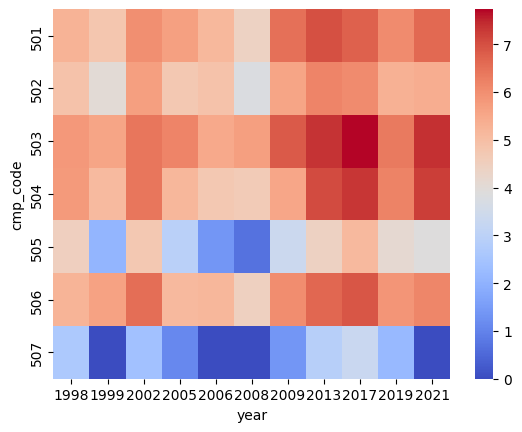

In [ ]:
heatmap= plot_cmp_code_heatmap(df_manifesto, "5", False)